In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DMining_Project/Project-Animal/final_df1.csv')
df

,Unnamed: 0,Avg_Pop_Size,Pop_Trend,N_loc,lifespan_Imp,pregDuration_Imp,Carnivore,Herbivore,Omnivore,Pop_Trend1,population status1,pop_status1
0,0,400000,Stable,11,15.0,61.0,1,0,0,2,2,Least concern (LC)
1,1,2656,Decreasing,11,12.0,103.0,1,0,0,3,1,Endangered (EN)
2,2,200000,Stable,11,35.0,56.0,0,0,1,2,2,Least concern (LC)
3,3,17500,Increasing,11,41.5,365.0,1,0,0,0,1,Endangered (EN)
4,4,50000,Unknown,11,41.5,495.0,1,0,0,1,0,Endangered (EN)
...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1799,2000,Increasing,1,19.0,120.0,0,0,1,0,3,Endangered (EN)
1800,1800,2750,Decreasing,9,20.0,120.0,1,0,0,3,3,Endangered (EN)
1801,1801,27500000,Decreasing,1,11.0,120.0,1,0,0,3,2,Least concern (LC)
1802,1802,113715,Decreasing,1,17.0,120.0,0,1,0,3,2,Least concern (LC)


In [ ]:
df.columns

Index(['Unnamed: 0', 'Avg_Pop_Size', 'Pop_Trend', 'N_loc', 'lifespan_Imp',
       'pregDuration_Imp', 'Carnivore', 'Herbivore', 'Omnivore', 'Pop_Trend1',
       'population status1', 'pop_status1'],
      dtype='object')

# Ordinal encoding for the Target Feature - Population Status 

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
df['pop_status'] = encoder1.fit_transform(df['pop_status1'])
df['pop_status'].unique()

array([1, 0])

In [ ]:
df

,Unnamed: 0,Avg_Pop_Size,Pop_Trend,N_loc,lifespan_Imp,pregDuration_Imp,Carnivore,Herbivore,Omnivore,Pop_Trend1,population status1,pop_status1,pop_status
0,0,400000,Stable,11,15.0,61.0,1,0,0,2,2,Least concern (LC),1
1,1,2656,Decreasing,11,12.0,103.0,1,0,0,3,1,Endangered (EN),0
2,2,200000,Stable,11,35.0,56.0,0,0,1,2,2,Least concern (LC),1
3,3,17500,Increasing,11,41.5,365.0,1,0,0,0,1,Endangered (EN),0
4,4,50000,Unknown,11,41.5,495.0,1,0,0,1,0,Endangered (EN),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1799,2000,Increasing,1,19.0,120.0,0,0,1,0,3,Endangered (EN),0
1800,1800,2750,Decreasing,9,20.0,120.0,1,0,0,3,3,Endangered (EN),0
1801,1801,27500000,Decreasing,1,11.0,120.0,1,0,0,3,2,Least concern (LC),1
1802,1802,113715,Decreasing,1,17.0,120.0,0,1,0,3,2,Least concern (LC),1


In [ ]:
df['pop_status'].value_counts()

1    1103
0     701
Name: pop_status, dtype: int64

# Taking the import features

In [ ]:
X =df[['Avg_Pop_Size', 'N_loc', 'lifespan_Imp',
       'pregDuration_Imp', 'Carnivore', 'Herbivore', 'Omnivore', 'Pop_Trend1']]

# Target Feature

In [ ]:
y = df[['pop_status']]
y

,pop_status
0,1
1,0
2,1
3,0
4,0
...,...
1799,0
1800,0
1801,1
1802,1


# spliting the data into train and test/


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Scaling the training data 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sclaed = scaler.transform(X_train)

X_test_sclaed = scaler.transform(X_test)

In [ ]:
x_testscaled = pd.DataFrame(X_test_sclaed,columns=X_train.columns)
x_testscaled
x_scaled = pd.DataFrame(X_train_sclaed,columns=X_train.columns)
x_scaled

,Avg_Pop_Size,N_loc,lifespan_Imp,pregDuration_Imp,Carnivore,Herbivore,Omnivore,Pop_Trend1
0,-0.071458,1.128586,0.887939,-0.139876,1.024556,-0.700502,-0.47320,0.910581
1,-0.167721,1.128586,-0.004018,-0.139876,1.024556,-0.700502,-0.47320,0.910581
2,-0.166906,-0.210315,-0.182409,0.413921,-0.976032,1.427549,-0.47320,-0.070725
3,-0.167746,-1.102916,-0.182409,0.137023,-0.976032,1.427549,-0.47320,-2.033335
4,-0.165359,-1.102916,2.047483,-0.139876,1.024556,-0.700502,-0.47320,0.910581
...,...,...,...,...,...,...,...,...
1438,-0.165359,-1.102916,-1.341953,-1.035180,1.024556,-0.700502,-0.47320,0.910581
1439,-0.165359,-1.102916,0.531156,0.413921,-0.976032,1.427549,-0.47320,0.910581
1440,-0.168147,-0.879765,0.441961,-0.139876,1.024556,-0.700502,-0.47320,0.910581
1441,-0.165359,-0.879765,-0.271605,0.727739,-0.976032,-0.700502,2.11327,0.910581


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2500, criterion='entropy',max_depth=127)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

<ipython-input-12-68f9278cf3d4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print("F1-score: ", f1_score(y_test,y_pred_rf,average='weighted'))
print("Accuracy score", accuracy_score(y_test,y_pred_rf))

F1-score:  0.8222378300100056
Accuracy score 0.8227146814404432


In [ ]:
# checking for recall score i.e the percentage of predicting the endangered species
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       141
           1       0.85      0.86      0.86       220

    accuracy                           0.82       361
   macro avg       0.81      0.81      0.81       361
weighted avg       0.82      0.82      0.82       361



In [ ]:
# confusion matrix
cm = (confusion_matrix(y_test,y_pred_rf))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)

              Endangered Least Concern
Endangered           107            34
Least Concern         30           190


In [ ]:
# calculating the auc score
from sklearn.metrics import roc_curve,roc_auc_score 
r_auc_rf = roc_auc_score(y_test,y_pred_rf)
r_auc_rf

0.811250805931657

In [ ]:
#dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
#xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
cm = (confusion_matrix(y_test,y_pred_rf))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)
print(classification_report(y_test,y_pred_rf))
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
#plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % r_auc_rf)
#plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_xgb)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


              Endangered Least Concern
Endangered           107            34
Least Concern         30           190
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       141
           1       0.85      0.86      0.86       220

    accuracy                           0.82       361
   macro avg       0.81      0.81      0.81       361
weighted avg       0.82      0.82      0.82       361



NameError: ignored

In [ ]:
senstivity = (cm[0][0])/(cm[0][1]+cm[0][0])
precision = (cm[0][0])/(cm[1][0]+cm[0][0])
print("Senstivity score for the random forest:", senstivity)
print("precision score for the random forest:", precision)

Senstivity score for the random forest: 0.7588652482269503
precision score for the random forest: 0.781021897810219


# Model parameters[Random Forest]

In [ ]:
rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 127,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Building summary table
senstivity = (cm[0][0])/(cm[0][1]+cm[0][0])
precision = (cm[0][0])/(cm[1][0]+cm[0][0])
print(senstivity,precision)
summary=[[]]
summary[0].append('Random Forest Classifier')
summary[0].append(rfc.get_params())
summary[0].append(senstivity)
summary[0].append(precision)
summary[0].append(f1_score(y_test,y_pred_rf,average='weighted'))
summary[0].append(accuracy_score(y_test,y_pred_rf))

0.7588652482269503 0.781021897810219


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=127)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print("F1-score: ", f1_score(y_test,y_pred_rf,average='weighted'))
print("Accuracy score", accuracy_score(y_test,y_pred_rf))

F1-score:  0.8222378300100056
Accuracy score 0.8227146814404432


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       141
           1       0.82      0.87      0.85       220

    accuracy                           0.81       361
   macro avg       0.80      0.79      0.79       361
weighted avg       0.80      0.81      0.80       361



In [ ]:
cm = (confusion_matrix(y_test,y_pred_dt))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)

              Endangered Least Concern
Endangered           100            41
Least Concern         29           191


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 
r_auc_dt = roc_auc_score(y_test,y_pred_dt)
r_auc_dt

0.7887008381689232

In [ ]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
#rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
#xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_xgb)

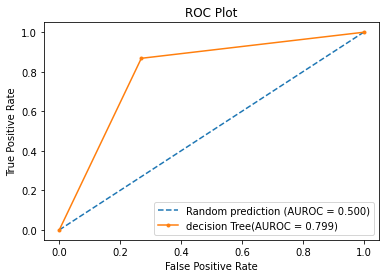

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % r_auc_rf)
#plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_xgb)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


In [ ]:
senstivity = (cm[0][0])/(cm[0][1]+cm[0][0])
precision = (cm[0][0])/(cm[1][0]+cm[0][0])
print(senstivity,precision)
summary1=[[]]
summary1[0].append('Decision Tree Classifier')
summary1[0].append(dt.get_params())
summary1[0].append(senstivity)
summary1[0].append(precision)
summary1[0].append(f1_score(y_test,y_pred_dt,average='weighted'))
summary1[0].append(accuracy_score(y_test,y_pred_dt))

0.7092198581560284 0.7751937984496124


In [ ]:
sum = summary+summary1

In [ ]:
pd.DataFrame(sum)

,0,1,2,3,4,5
0,Random Forest Classifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.709220,0.769231,0.824890,0.825485
1,Decision Tree Classifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.723404,0.778626,0.810265,0.811634


In [ ]:
lst=[[]]
lst[0].append(0)
lst[0][1].append(1)

IndexError: ignored

In [ ]:
lst

[[0], 1]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_scaled,y_train)
y_pred_lr = lr.predict(x_testscaled)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print(f1_score(y_test,y_pred_lr,average='weighted'))
print(accuracy_score(y_test,y_pred_lr))

0.71785156777481
0.7257617728531855


In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 
r_auc_lr = roc_auc_score(y_test,y_pred_lr)
r_auc_lr

0.6922308188265636

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       141
           1       0.74      0.85      0.79       220

    accuracy                           0.73       361
   macro avg       0.72      0.69      0.70       361
weighted avg       0.72      0.73      0.72       361



              Endangered Least Concern
Endangered            76            65
Least Concern         34           186
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       141
           1       0.74      0.85      0.79       220

    accuracy                           0.73       361
   macro avg       0.72      0.69      0.70       361
weighted avg       0.72      0.73      0.72       361



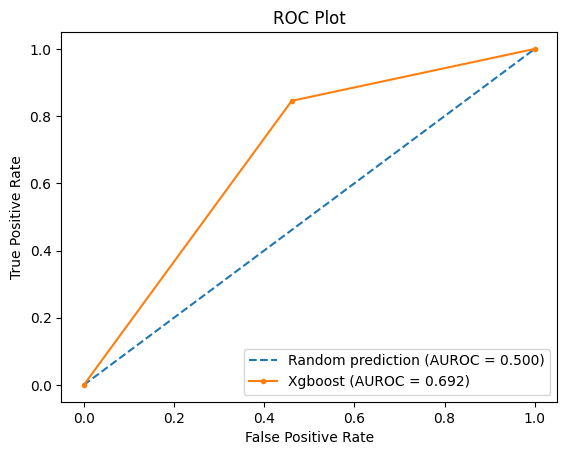

In [ ]:
cm = (confusion_matrix(y_test,y_pred_lr))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)
print(classification_report(y_test,y_pred_lr))
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
#plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
#plt.plot(rf_fpr, rf_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % r_auc_xgb)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_lr)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


# Xgboost

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=2200,classifier__max_leaf_nodesd=10)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

[19:58:22] WARNING: ../src/learner.cc:767: 
Parameters: { "classifier__max_leaf_nodesd" } are not used.



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print(f1_score(y_test,y_pred_xgb,average='weighted'))
print(accuracy_score(y_test,y_pred_xgb))

0.8137720536110464
0.814404432132964


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       141
           1       0.84      0.86      0.85       220

    accuracy                           0.81       361
   macro avg       0.81      0.80      0.80       361
weighted avg       0.81      0.81      0.81       361



In [ ]:
confusion_matrix(y_test,y_pred_xgb)

array([[105,  36],
       [ 31, 189]])

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 
r_auc_xgb = roc_auc_score(y_test,y_pred_xgb)
r_auc_xgb

0.8018858800773695

In [ ]:
#dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
#rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_xgb)

In [ ]:
print(r_auc_xgb,r_auc_dt,r_auc_rf)

0.8018858800773695 0.7887008381689232 0.811250805931657


              Endangered Least Concern
Endangered           105            36
Least Concern         31           189
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       141
           1       0.85      0.87      0.86       220

    accuracy                           0.83       361
   macro avg       0.82      0.82      0.82       361
weighted avg       0.83      0.83      0.83       361



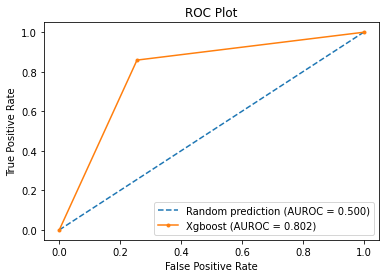

In [ ]:
cm = (confusion_matrix(y_test,y_pred_xgb))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)
print(classification_report(y_test,y_pred_rf))
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
#plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
#plt.plot(rf_fpr, rf_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % r_auc_xgb)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_xgb)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


In [ ]:
senstivity = (cm[0][0])/(cm[0][1]+cm[0][0])
precision = (cm[0][0])/(cm[1][0]+cm[0][0])
print(senstivity,precision)
summary2=[[]]
summary2[0].append('XgBoost Classifier')
summary2[0].append(model.get_params())
summary2[0].append(senstivity)
summary2[0].append(precision)
summary2[0].append(f1_score(y_test,y_pred_xgb,average='weighted'))
summary2[0].append(accuracy_score(y_test,y_pred_xgb))

0.7092198581560284 0.7751937984496124


In [ ]:
sum = summary + summary1 + summary2 
Summary_Performance = pd.DataFrame(sum,columns=[['Classifier','Parameters','Senstivity','Precision','F1-score','Accuracy']])
Summary_Performance.to_csv('table1.csv')
(Summary_Performance)

,Classifier,Parameters,Senstivity,Precision,F1-score,Accuracy
0,Random Forest Classifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.758865,0.781022,0.822238,0.822715
1,Decision Tree Classifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.709220,0.775194,0.804359,0.806094
2,XgBoost Classifier,"{'objective': 'binary:logistic', 'use_label_en...",0.709220,0.775194,0.813772,0.814404


In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
#plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % r_auc_rf)
#plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_xgb)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Oversampling the endangered class - 0

In [ ]:
import numpy as np
unique, count = np.unique(y_train,return_counts= True)
print(unique, count)

[0 1] [560 883]


In [ ]:
from imblearn.over_sampling._smote.filter import SVMSMOTE
from imblearn.over_sampling._smote import SMOTENC
from imblearn.over_sampling import SMOTE
sm = SVMSMOTE(random_state=43)
X_trains, y_trains = sm.fit_resample(X_train,y_train)

In [ ]:
import numpy as np
unique, count = np.unique(y_trains,return_counts= True)
print(unique, count)

[0 1] [883 883]


In [ ]:
import xgboost as xgb
#model = xgb.XGBClassifier()
model = RandomForestClassifier(n_estimators=2000)
model.fit(X_trains, y_trains)
y_pred_xgb = model.predict(X_test)

<ipython-input-30-a1c3999bbfa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trains, y_trains)


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print(f1_score(y_test,y_pred_xgb,average='weighted'))
print(accuracy_score(y_test,y_pred_xgb))

0.8340007792361883
0.8337950138504155


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       141
           1       0.87      0.86      0.86       220

    accuracy                           0.83       361
   macro avg       0.83      0.83      0.83       361
weighted avg       0.83      0.83      0.83       361



In [ ]:
# hyperparameter tuning for the random forest
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])
grid_param = [
                {'classifier':[RandomForestClassifier()],
                 'classifier__n_estimators': [10,1000,4000],
                 'classifier__max_depth':[5,8,15,25,30,None],
                 'classifier__min_samples_leaf':[1,2,5,10,15,100],
                 'classifier__max_leaf_nodes':[2,5,10]} ]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)
bestmodel = gridsearch.fit(X_trains,y_trains)

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
print(bestmodel.best_estimator_)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        n_estimators=10))])


In [ ]:
import xgboost as xgb
#model = xgb.XGBClassifier()
model = RandomForestClassifier(max_depth=15, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        n_estimators=10)
model.fit(X_trains, y_trains)
y_pred_xgb = model.predict(X_test)

<ipython-input-43-4d502a383398>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trains, y_trains)


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print(f1_score(y_test,y_pred_xgb,average='weighted'))
print(accuracy_score(y_test,y_pred_xgb))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

0.7725558537926144
0.7728531855955678
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       141
           1       0.81      0.82      0.81       220

    accuracy                           0.77       361
   macro avg       0.76      0.76      0.76       361
weighted avg       0.77      0.77      0.77       361



# calculating ROC curves for DT,RF,XGB

In [ ]:
#dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_xgb)

NameError: ignored

 # plot

In [ ]:
print("Roc Score for XgBoost:",r_auc_xgb)
print("Roc Score for Decision Tree:",r_auc_dt)
print("Roc Score for Random Forest:",r_auc_rf)

Roc Score for XgBoost: 0.8018858800773695
Roc Score for Decision Tree: 0.7887008381689232
Roc Score for Random Forest: 0.811250805931657


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
len(r_probs)
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
print(r_fpr, r_tpr)

[0. 1.] [0. 1.]


In [ ]:
import matplotlib.pyplot as plt

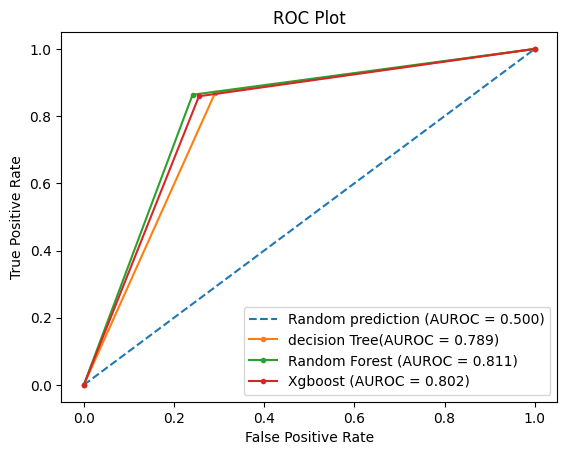

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='decision Tree(AUROC = %0.3f)' % r_auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % r_auc_rf)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_xgb)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()


# Hyperparameter Tunining for the XgBoost Model

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [ ]:
space={'max_depth': hp.quniform("max_depth", 5, 25, 5),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 250,
        'seed': 0
    }

In [ ]:
from sklearn.model_selection import cross_val_score
def objective(space):
  model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
  
  accuracy = cross_val_score(model,X_train,y_train,cv=5).mean()
  return {'loss': -accuracy, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo = tpe.suggest, max_evals=250, trials=trials)
best

100%|██████████| 250/250 [01:53<00:00,  2.21trial/s, best loss: -0.7789383890811227]


{'colsample_bytree': 0.5934104745768924,
 'gamma': 1.035028187919931,
 'max_depth': 5.0,
 'min_child_weight': 8.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.7017699068376877}

In [ ]:
# taking the best parameters possible
print("the best possible parameters are:", best)

the best possible parameters are: {'colsample_bytree': 0.5934104745768924, 'gamma': 1.035028187919931, 'max_depth': 5.0, 'min_child_weight': 8.0, 'reg_alpha': 40.0, 'reg_lambda': 0.7017699068376877}


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(colsample_bylevel=best['colsample_bytree'],gamma=best['gamma'],
                          max_depth=int(best['max_depth']),min_child_weight=best['min_child_weight'],
                          reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'])
model.fit(X_train, y_train)
y_pred_hyo = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print("F1-score: ", f1_score(y_test,y_pred_rf,average='weighted'))
print("Accuracy score", accuracy_score(y_test,y_pred_rf))

F1-score:  0.8222378300100056
Accuracy score 0.8227146814404432


###  Getting nearly the same result as without the hyperparameter tuning

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_hyo))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       141
           1       0.83      0.89      0.86       220

    accuracy                           0.82       361
   macro avg       0.82      0.80      0.81       361
weighted avg       0.82      0.82      0.82       361



### The recall score for class '1' i.e Least concern is increasing but our point of interest id class '0' endangered

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
adaboost = AdaBoostClassifier(n_estimators=200, random_state=32)
adaboost.fit(X_train,y_train) 
y_pred_ada = adaboost.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
print("F1-score: ", f1_score(y_test,y_pred_ada,average='weighted'))
print("Accuracy score", accuracy_score(y_test,y_pred_ada))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1-score:  0.8277928978221928
Accuracy score 0.8282548476454293


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       141
           1       0.85      0.87      0.86       220

    accuracy                           0.83       361
   macro avg       0.82      0.82      0.82       361
weighted avg       0.83      0.83      0.83       361



In [ ]:
confusion_matrix(y_test,y_pred_ada)

array([[108,  33],
       [ 29, 191]])

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
len(r_probs)
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
print(r_fpr, r_tpr)

[0. 1.] [0. 1.]


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 
r_auc_ada = roc_auc_score(y_test,y_pred_ada)
r_auc_ada

0.8170696324951644

In [ ]:
ada_fpr, ada_tpr, _ = roc_curve(y_test, y_pred_ada)

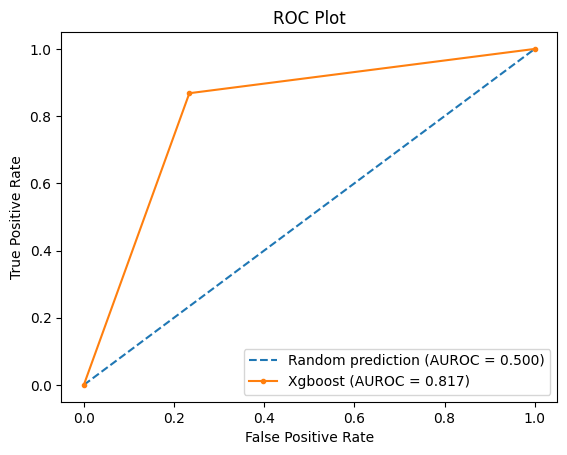

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(ada_fpr, ada_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % r_auc_ada)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


In [ ]:
cm = (confusion_matrix(y_test,y_pred_ada))
df_cm = pd.DataFrame(cm,columns=[['Endangered','Least Concern']], index=['Endangered','Least Concern'])
print(df_cm)

              Endangered Least Concern
Endangered           108            33
Least Concern         29           191
